Economic Data Analysis with Fred and Pandas

In [ ]:
!pip install fredapi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns',500)
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_key= 'enter your key here'


Create Fred object

In [ ]:
fred= Fred(api_key=fred_key)

Search Economic data

In [ ]:
sp_search=fred.search('S&P', order_by='popularity')

In [ ]:
sp_search.shape

(1000, 15)

In [ ]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-07-14,2025-07-14,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-07-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-11 06:42:11-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-07-14,2025-07-14,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-06-24 08:12:56-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-07-14,2025-07-14,S&P 500,2015-07-13,2025-07-11,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-07-11 19:02:07-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-07-14,2025-07-14,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-07-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-11 06:42:15-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-07-14,2025-07-14,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-07-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-11 06:49:02-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2025-07-14,2025-07-14,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
Q03069USQ605NNBR,Q03069USQ605NNBR,2025-07-14,2025-07-14,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2025-07-14,2025-07-14,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...


Pull raw data

In [ ]:
sp500=fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

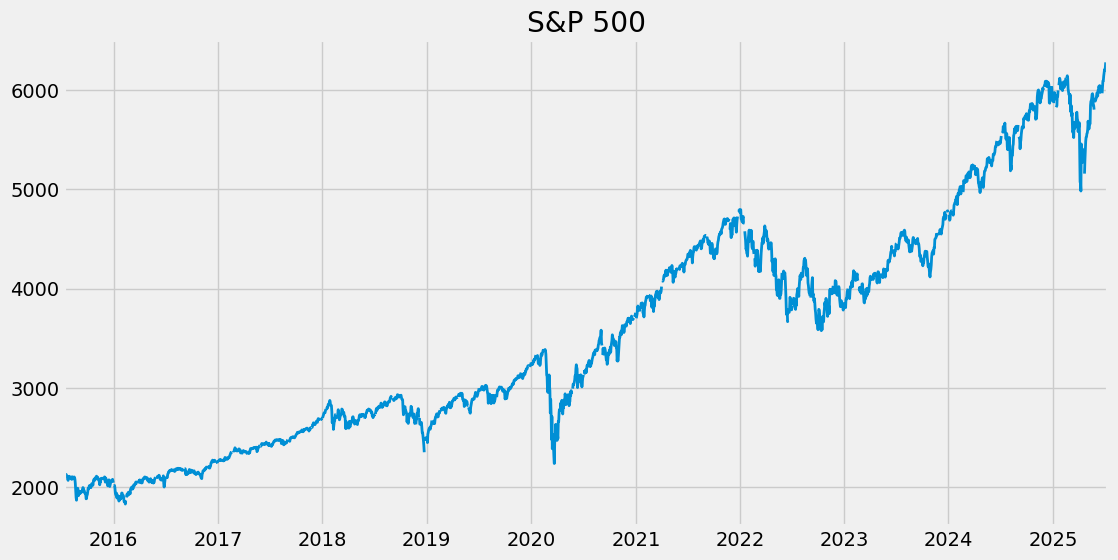

In [ ]:
sp500.plot(figsize=(12,6), title='S&P 500', lw=2)

Pull and join Multiple Data series

In [ ]:
unemployment_results=fred.search('unemployment')

In [ ]:
unemployment_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-07-14,2025-07-14,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:47:54-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-07-14,2025-07-14,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-07-03 07:47:54-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-07-14,2025-07-14,Unemployment Level,1948-01-01,2025-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-07-03 07:48:40-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2025-07-14,2025-07-14,Noncyclical Rate of Unemployment,1949-01-01,2035-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2025-03-17 15:44:05-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-07-14,2025-07-14,Continued Claims (Insured Unemployment),1967-01-07,2025-06-28,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-07-10 07:33:02-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENUC317430010,ENUC317430010,2025-07-14,2025-07-14,"Total Quarterly Wages in Manhattan, KS (MSA)",2013-01-01,2024-10-01,Quarterly,Q,Dollars,$,Not Seasonally Adjusted,NSA,2025-06-04 11:20:23-05:00,1,Total wages are the wages paid by Unemployment...
IPUEN3116L020000000,IPUEN3116L020000000,2025-07-14,2025-07-14,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2024-01-01,Annual,A,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2025-04-24 15:24:03-05:00,1,"Labor compensation, defined as payroll plus su..."
IPUEN3116U110000000,IPUEN3116U110000000,2025-07-14,2025-07-14,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2024-01-01,Annual,A,Index 2017=100,Index 2017=100,Not Seasonally Adjusted,NSA,2025-04-24 15:24:02-05:00,1,"Labor compensation, defined as payroll plus su..."


<Axes: >

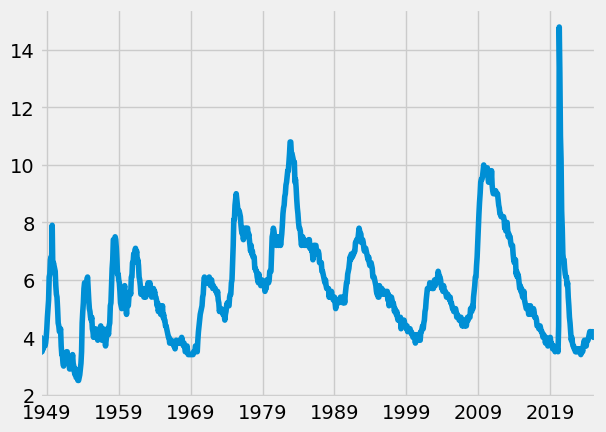

In [ ]:
unrate=fred.get_series('UNRATE')
unrate.plot()

In [ ]:
unemp_df=fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

In [ ]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-07-14,2025-07-14,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:47:54-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-07-14,2025-07-14,Unemployment Rate,1948-01-01,2025-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-07-03 07:47:54-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-07-14,2025-07-14,Unemployment Rate - Black or African American,1972-01-01,2025-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-07-03 07:48:17-05:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2025-07-14,2025-07-14,Unemployment Level,1948-01-01,2025-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-07-03 07:48:40-05:00,71,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2025-07-14,2025-07-14,Unemployment Level,1948-01-01,2025-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2025-07-03 07:48:01-05:00,27,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN300190000000005,LAUCN300190000000005,2025-07-14,2025-07-14,"Employed Persons in Daniels County, MT",1990-01-01,2025-05-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-07-02 10:26:40-05:00,0,These data come from the Current Population Su...
LAUCN470950000000005,LAUCN470950000000005,2025-07-14,2025-07-14,"Employed Persons in Lake County, TN",1990-01-01,2025-05-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-07-02 10:19:25-05:00,0,These data come from the Current Population Su...
LAUCN220350000000005,LAUCN220350000000005,2025-07-14,2025-07-14,"Employed Persons in East Carroll Parish, LA",1990-01-01,2025-05-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-07-02 10:29:58-05:00,0,These data come from the Current Population Su...


In [ ]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
unemp_df.shape

(52, 15)

In [ ]:
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [ ]:
unemp_df.shape

(46, 15)

In [ ]:
all_results=[]
for myid in unemp_df.index:
  results=fred.get_series(myid)
  results=results.to_frame(name=myid)
  all_results.append(results)

In [ ]:
type(all_results)

list

In [ ]:
all_results[4]

,M0892AUSM156SNBR
1929-04-01,0.69
1929-05-01,1.65
1929-06-01,2.06
1929-07-01,0.79
1929-08-01,0.04
...,...
1942-02-01,3.56
1942-03-01,3.22
1942-04-01,2.33
1942-05-01,1.22


In [ ]:
unemp_results=pd.concat(all_results, axis=1)

In [ ]:
cols_to_drop = []
for i in unemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
unemp_results = unemp_results.drop(columns = cols_to_drop, axis=1)

In [ ]:
uemp_states = unemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [ ]:
# Plot States Unemployment Rate
px.line(uemp_states)

Pull april 2020 Unemployment rate per state

In [ ]:
apr_2020rate=uemp_states.loc[uemp_states.index == '2020-04-01'].T.sort_values('2020-04-01')

<Axes: title={'center': 'April 2020 Unemployment Rate'}>

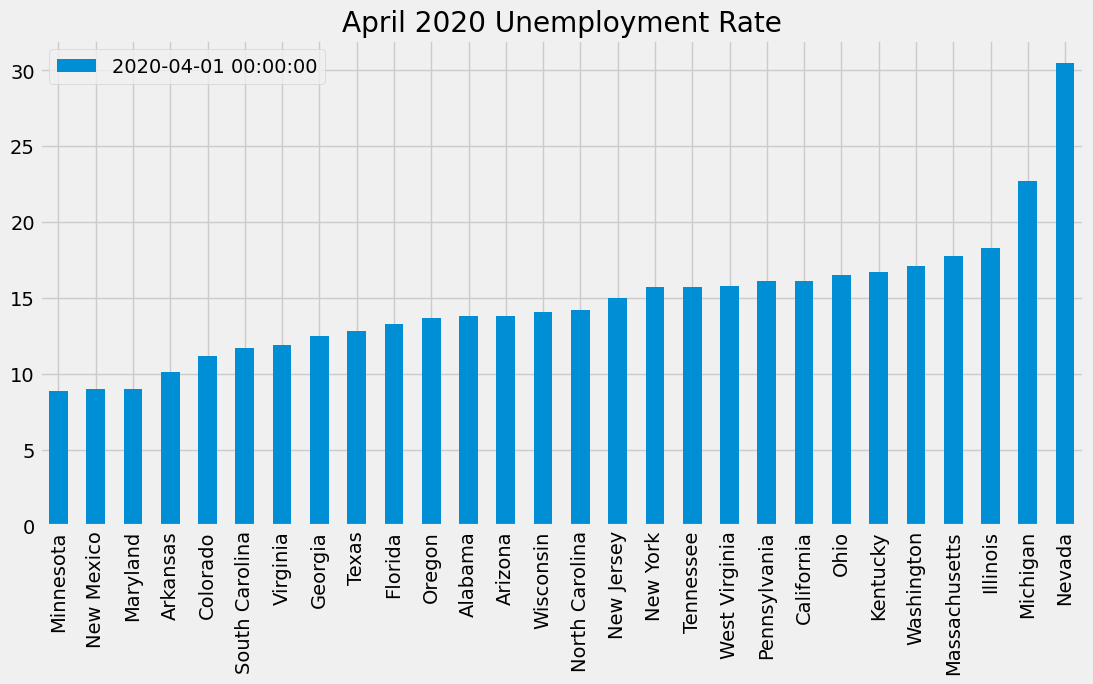

In [ ]:
apr_2020rate.plot(kind='bar', figsize=(12,6), title='April 2020 Unemployment Rate')

Pull Participation rate

In [ ]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

Plot Unemp vs Participation

In [ ]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

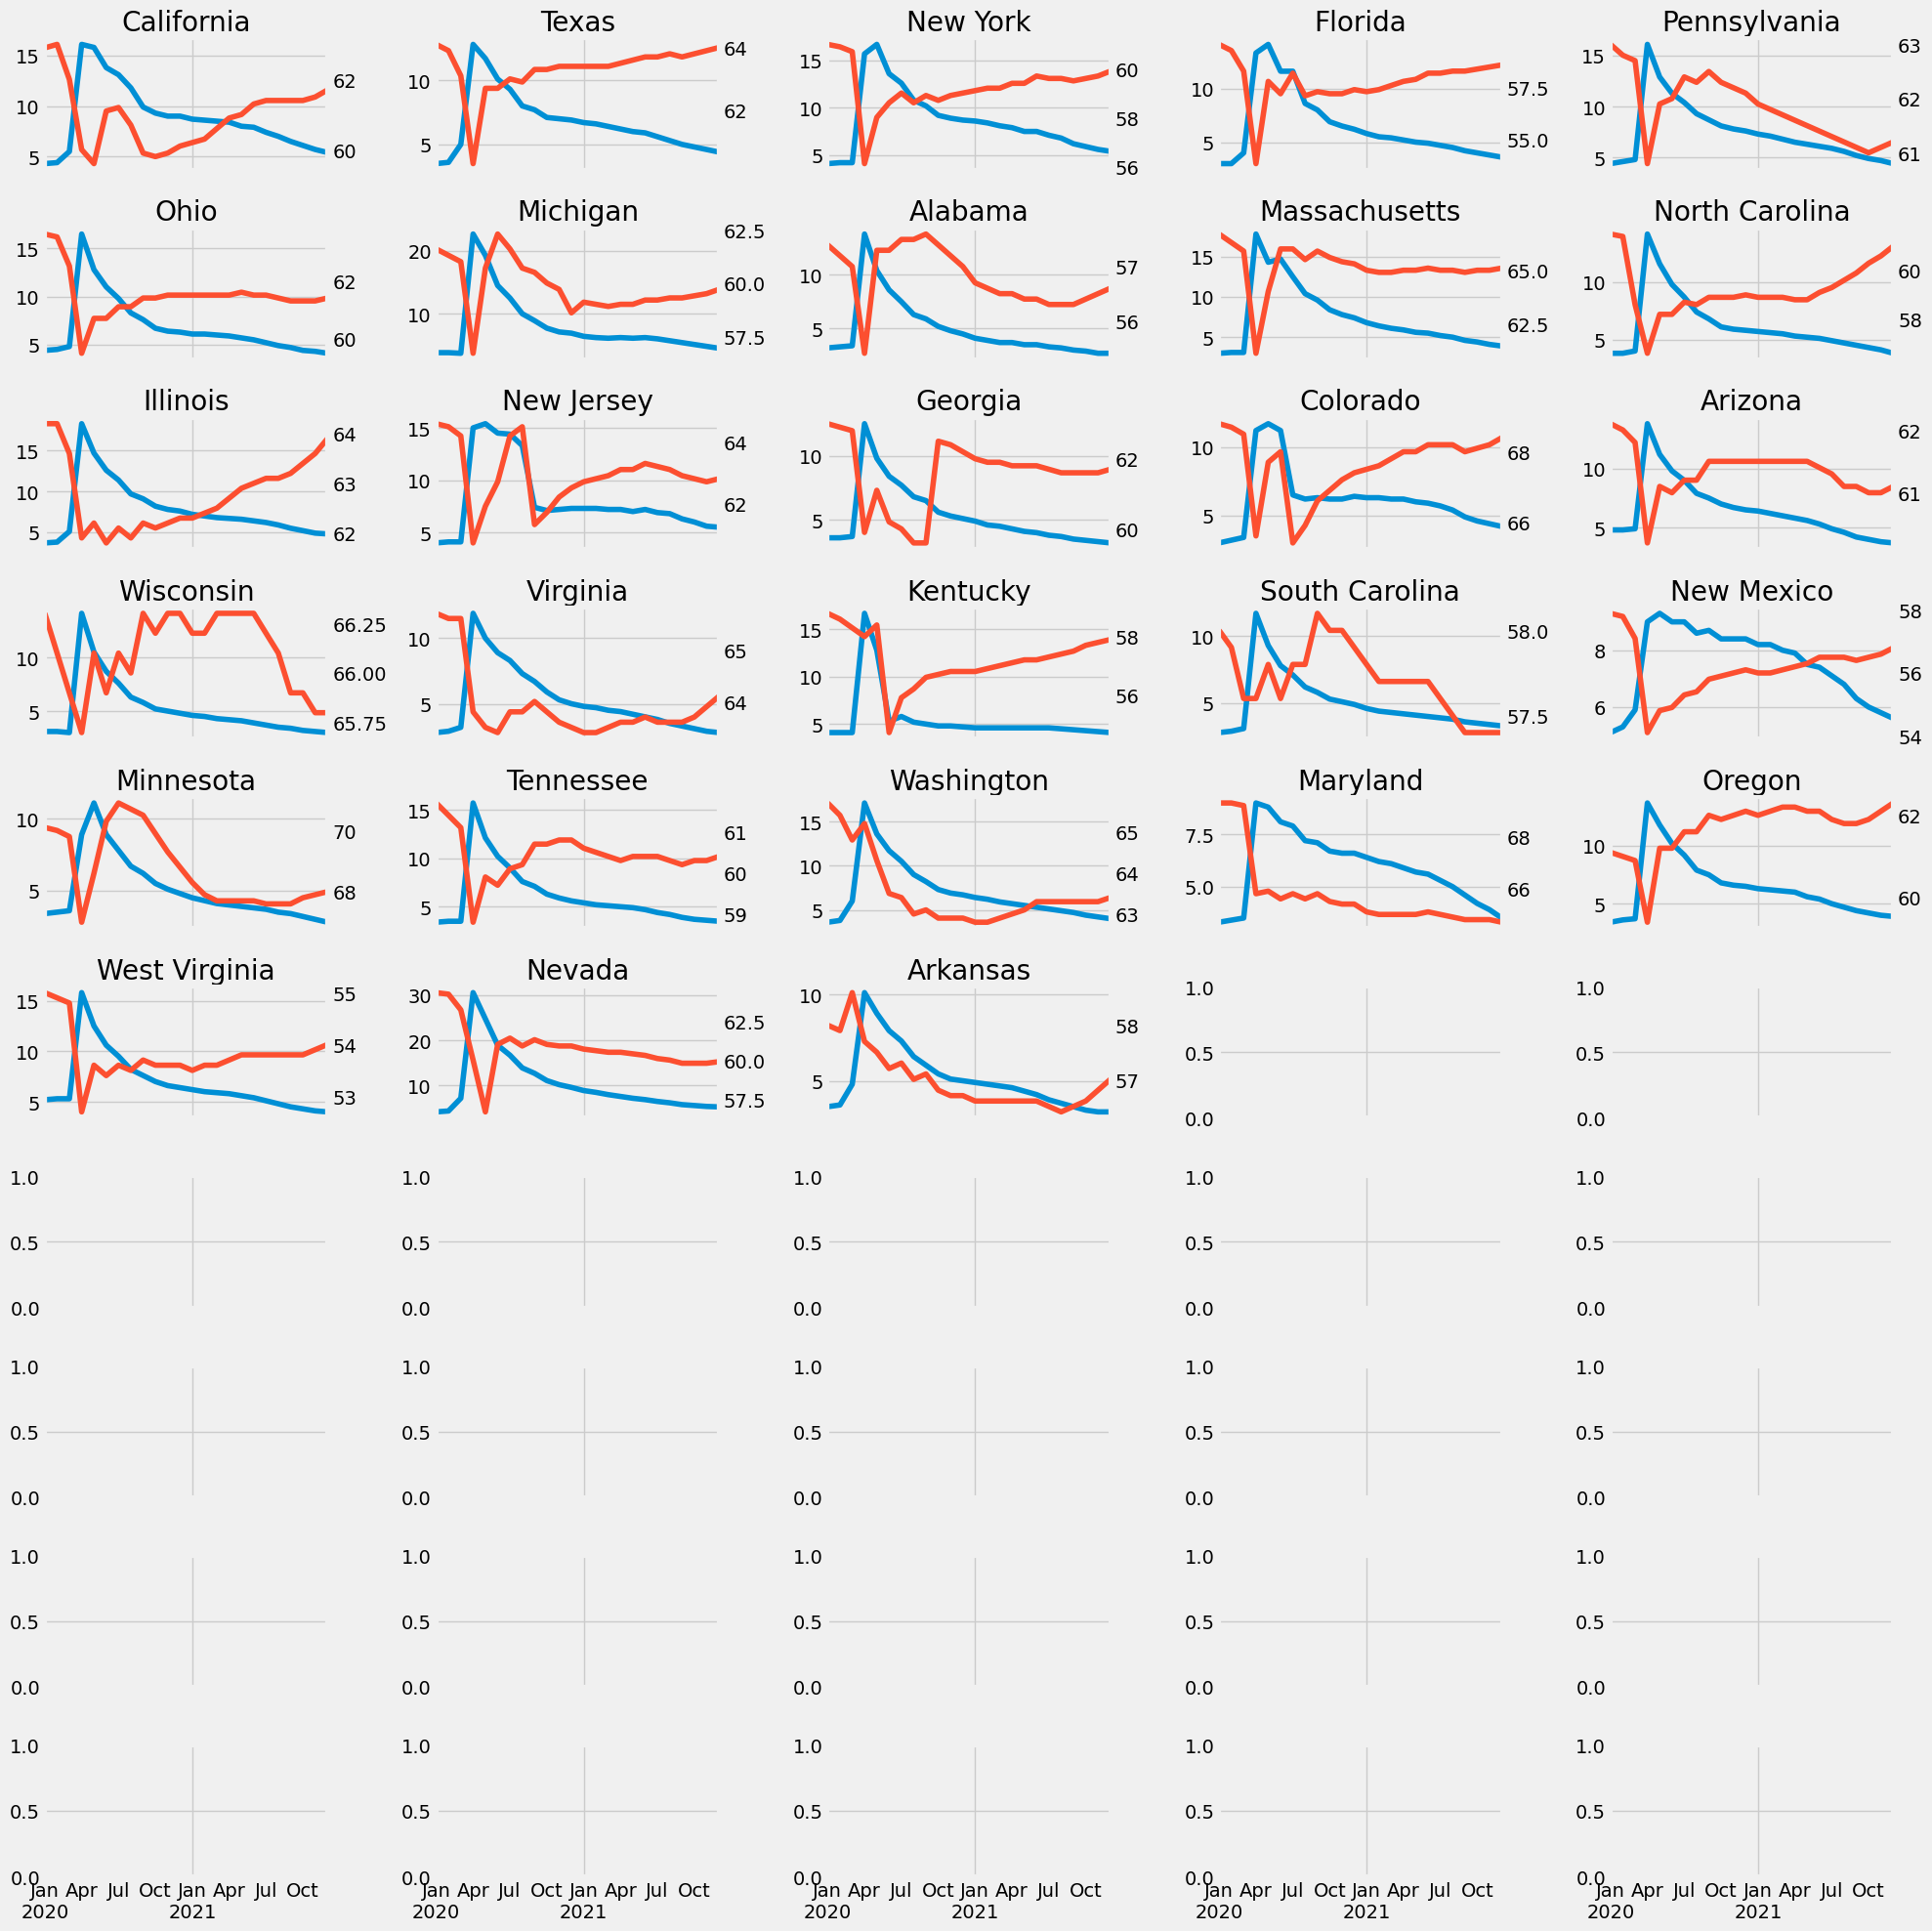

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(20, 20), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()



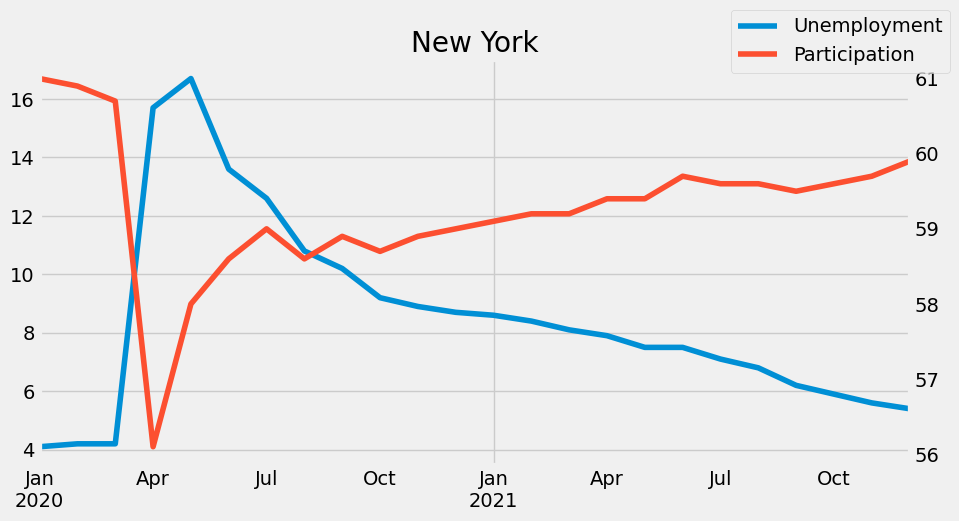

In [ ]:
state = 'New York'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()